In [54]:
#VQE Base code source: https://qiskit.org/documentation/tutorials/algorithms/04_vqe_advanced.html
#The following is the code for a VQE based on Qiskit Terra in light of Aqua's deprecation

import numpy as np
import matplotlib.pyplot as plt
from qiskit import Aer
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import SLSQP
from qiskit.circuit.library import EfficientSU2
from qiskit_nature.mappers.second_quantization import JordanWignerMapper
from qiskit_nature.problems.second_quantization.lattice import LineLattice, FermiHubbardModel

0.5 * IIIIIIIIIYZY
+ 0.5 * IIIIIIIIIXZX
+ 0.5 * IIIIIIIYZYII
+ 0.5 * IIIIIIIXZXII
+ 0.5 * IIIIIYZYIIII
+ 0.5 * IIIIIXZXIIII
+ 0.5 * IIIYZYIIIIII
+ 0.5 * IIIXZXIIIIII
+ 0.5 * IYZYIIIIIIII
+ 0.5 * IXZXIIIIIIII
+ 30.0 * IIIIIIIIIIII
- 3.0 * IIIIIIIIIIIZ
- 3.0 * IIIIIIIIIZII
- 3.0 * IIIIIIIZIIII
- 3.0 * IIIIIZIIIIII
- 3.0 * IIIZIIIIIIII
- 3.0 * IZIIIIIIIIII
+ 0.5 * IIIIIIIIYZYI
+ 0.5 * IIIIIIIIXZXI
+ 0.5 * IIIIIIYZYIII
+ 0.5 * IIIIIIXZXIII
+ 0.5 * IIIIYZYIIIII
+ 0.5 * IIIIXZXIIIII
+ 0.5 * IIYZYIIIIIII
+ 0.5 * IIXZXIIIIIII
+ 0.5 * YZYIIIIIIIII
+ 0.5 * XZXIIIIIIIII
- 3.0 * IIIIIIIIIIZI
- 3.0 * IIIIIIIIZIII
- 3.0 * IIIIIIZIIIII
- 3.0 * IIIIZIIIIIII
- 3.0 * IIZIIIIIIIII
- 3.0 * ZIIIIIIIIIII
+ 1.0 * IIIIIIIIIIZZ
+ 1.0 * IIIIIIIIZZII
+ 1.0 * IIIIIIZZIIII
+ 1.0 * IIIIZZIIIIII
+ 1.0 * IIZZIIIIIIII
+ 1.0 * ZZIIIIIIIIII


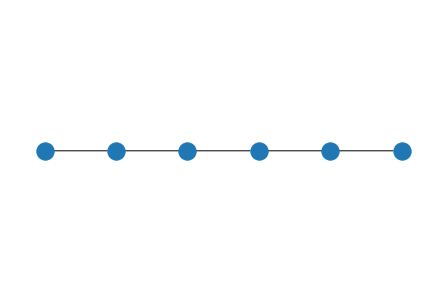

In [49]:
# Model specifications: 6 sites, U = 4, t = 1, Jordan-Wigner qubit mapping

L = LineLattice(6,onsite_parameter=4,edge_parameter=1)

L.draw() # Drawing of Hubbard Model lattice
hamiltonian = FermiHubbardModel(L,4).second_q_ops(display_format='dense')
op = JordanWignerMapper().map(hamiltonian)

#print(L.weighted_edge_list)
print(op) # Hubbard model Hamiltonian in the form of fermionic operators

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
[(8.6724977136e-08+0j), (1.68351766094e-07+0j), (8.24858048981e-07+0j), (2.585787691211701+0j), (2.079835515941e-06+0j), (1.39313796614e-06+0j), (7.869144162645e-06+0j), (3.411193320904e-06+0j), (5.961922666043e-06+0j), (2.115508299209e-06+0j), (1.4559210428692e-05+0j), (4.6740991771523e-05+0j), (8.780546545987e-06+0j), (0.007539115674025643+0j), (3.271812414958613+0j)]


Text(0, 0.5, 'Energy (Ha)')

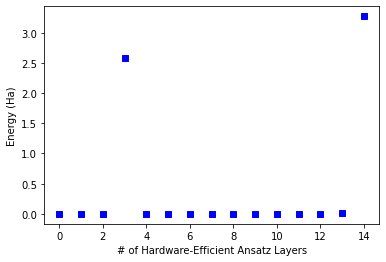

In [50]:
#Initial point of optimization
seed = 50
algorithm_globals.random_seed = seed
qi = QuantumInstance(Aer.get_backend('statevector_simulator'), seed_transpiler=seed, seed_simulator=seed)
slsqp = SLSQP(maxiter=1000)

energies = []
layers = []

for i in range(15):
    print(i)
    ansatz = EfficientSU2(num_qubits=12, reps = i)
    vqe = VQE(ansatz, optimizer=slsqp, quantum_instance=qi)
    result = vqe.compute_minimum_eigenvalue(operator=op)
    layers.append(i)
    energies.append(result.eigenvalue)
    
print(energies)

plt.plot(layers,energies,'bs')
plt.xlabel('# of Hardware-Efficient Ansatz Layers')
plt.ylabel('Energy (Ha)')
#optimizer_evals = result.optimizer_evals

Text(0, 0.5, 'Energy (Ha)')

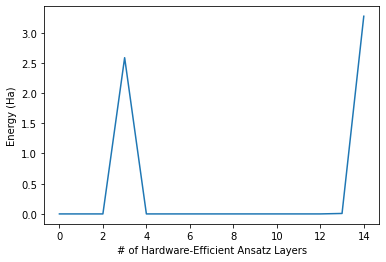

In [57]:
layersSave = layers.copy()
energiesSave = energies.copy()

plt.plot(layersSave,energiesSave)
plt.xlabel('# of Hardware-Efficient Ansatz Layers')
plt.ylabel('Energy (Ha)')